<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/Course_8_Module_3_P2_Exercise_Generating_Maps_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Creating maps and visualizing Geospatial data


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Create maps and visualize geospatial data with Folium


## Introduction

In this lab, we will learn how to create maps for different objectives. To do that, we will part ways with Matplotlib and work with another Python visualization library, namely **Folium**. What is nice about **Folium** is that it was developed for the sole purpose of visualizing geospatial data. While other libraries are available to visualize geospatial data, such as **plotly**, they might have a cap on how many API calls you can make within a defined time frame. **Folium**, on the other hand, is completely free.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Exploring Datasets*](#0)<br>
2. [Importing Libraries](#2)<br>
3. [Introduction to Folium](#4) <br>
4. [Map with Markers](#6) <br>
5. [Choropleth Maps](#8) <br>
</div>


# Exploring Datasets<a id="0"></a>

Toolkits: This lab heavily relies on [*pandas*](http://pandas.pydata.org/) and [*Numpy*](http://www.numpy.org/) for data wrangling, analysis, and visualization. The primary plotting library we will explore in this lab is [**Folium**](https://github.com/python-visualization/folium/).

Datasets:

1. San Francisco Police Department Incidents for the year 2016 - [Police Department Incidents](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry) from San Francisco public data portal. Incidents derived from San Francisco Police Department (SFPD) Crime Incident Reporting system. Updated daily, showing data for the entire year of 2016. Address and location has been anonymized by moving to mid-block or to an intersection. Note: this dataset no longer exists on the original website since systems updates in the department.  The link included will take you to the page explaining the change of system since this exercise was created.   

2. Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website. The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian Immigration data and use the *already cleaned dataset*.<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Pandas skill [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/v4/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)


# Importing Libraries <a id="2"></a>


Import Primary Modules:


In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

#### Let's install **Folium**


**Folium** is not available by default. So, we first need to install it before we are able to import it.


In [2]:
#!pip3 install folium==0.5.0
import folium

print('Folium installed and imported!')

Folium installed and imported!


# Introduction to Folium <a id="4"></a>


Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, Cartodb and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.


Generating the world map is straightforward in **Folium**. You simply create a **Folium** *Map* object, and then you display it. What is attractive about **Folium** maps is that they are interactive, so you can zoom into any region of interest despite the initial zoom level.


In [3]:
# define the world map
world_map = folium.Map()

# display world map
world_map

Go ahead. Try zooming in and out of the rendered map above.


You can customize this default definition of the world map by specifying the centre of your map, and the initial zoom level.

All locations on a map are defined by their respective *Latitude* and *Longitude* values. So you can create a map and pass in a center of *Latitude* and *Longitude* values of **[0, 0]**.

For a defined center, you can also define the initial zoom level into that location when the map is rendered. **The higher the zoom level the more the map is zoomed into the center**.

Let's create a map centered around Canada and play with the zoom level to see how it affects the rendered map.


In [4]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

Let's create the map again with a higher zoom level.


In [5]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

As you can see, the higher the zoom level the more the map is zoomed into the given center.


**Question**: Create a map of Mexico with a zoom level of 4.


In [6]:
# define the world map centered around Mexico with a higher zoom level
mexico_map = folium.Map(location=[23.6345, -102.5528], zoom_start=4)
# location [latitude,longitude]
# display Mexico map
mexico_map





<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    #define Mexico's geolocation coordinates
    mexico_latitude = 23.6345
    mexico_longitude = -102.5528

    # define the world map centered around Canada with a higher zoom level
    mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=4)

    # display world map
    mexico_map

```

</details>


Another cool feature of **Folium** is that you can generate different map styles.


In [7]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 75.6 MB/s eta 0:00:00


In [33]:
pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.1 MB/s eta 0:00:00


### A. Cartodb dark_matter Maps

These are high-contrast B+W (black and white) maps. They are perfect for data mashups and exploring river meanders and coastal zones.


Let's create a Cartodb dark_matter map of canada with a zoom level of 4.


In [39]:
# create a Cartodb dark_matter map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Cartodb dark_matter')

# display map
world_map

Feel free to zoom in and out to see how this style compares to the default one.


### B. Cartodb positron Maps

CartoDB Positron maps are designed with a light and minimalistic aesthetic. They have a white or light-colored background and feature simple, clean lines for map elements. These maps are known for their modern and visually appealing design.


Let's create a Cartodb positron map of Canada with zoom level 4.


In [40]:
# create a Cartodb positron map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Cartodb positron')

# display map
world_map

Feel free to zoom in and out to see how this style compares to Cartodb dark_matter, and the default style.


Zoom in and notice how the borders start showing as you zoom in, and the displayed country names are in English.


**Question**: Create a map of Mexico to visualize a clean and modern design with a light-colored background. Use a zoom level of 6.


In [41]:
# define the world map centered around Mexico with a higher zoom level
mexico_map = folium.Map(location=[23.6345, -102.5528], zoom_start=6, tiles='Cartodb positron' )
# location [latitude,longitude]
# display Mexico map
mexico_map





<details><summary>Click here for a sample python solution</summary>

```python
    #The correct answer is:
    
    #define Mexico's geolocation coordinates
    mexico_latitude = 23.6345
    mexico_longitude = -102.5528

    # define the world map centered around Canada with a higher zoom level
    mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=6, tiles='Cartodb positron')

    # display world map
    mexico_map

```

</details>


# Maps with Markers <a id="6"></a>


Let's download and import the data on police department incidents using *pandas* `read_csv()` method.


Download the dataset and read it into a *pandas* dataframe:


In [42]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Let's take a look at the first five items in our dataset.


In [43]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

So each row consists of 13 features:
> 1. **IncidntNum**: Incident Number
> 2. **Category**: Category of crime or incident
> 3. **Descript**: Description of the crime or incident
> 4. **DayOfWeek**: The day of week on which the incident occurred
> 5. **Date**: The Date on which the incident occurred
> 6. **Time**: The time of day on which the incident occurred
> 7. **PdDistrict**: The police department district
> 8. **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9. **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID


Let's find out how many entries there are in our dataset.


In [44]:
df_incidents.shape

(150500, 13)

So the dataframe consists of 150,500 crimes, which took place in the year 2016. In order to reduce computational cost, let's just work with the first 100 incidents in this dataset.


In [45]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Let's confirm that our dataframe now consists only of 100 crimes.


In [46]:
df_incidents.shape

(100, 13)

Now that we reduced the data a little, let's visualize where these crimes took place in the city of San Francisco. We will use the default style, and we will initialize the zoom level to 12.


In [47]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [54]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

Now let's superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the `sanfran_map`.


In [55]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()  # A FeatureGroup is created to hold multiple markers or layers that will be added to the map as a single grou

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):   #he zip function combines two lists or columns (latitude Y and longitude X) from the df_incidents DataFrame.
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

You can also add some pop-up text that would get displayed when you hover over a marker. Let's make each marker display the category of the crime when hovered over.


In [57]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

Isn't this really cool? Now you are able to know what crime category occurred at each marker.

If you find the map to be so congested will all these markers, there are two remedies to this problem. The simpler solution is to remove these location markers and just add the text to the circle markers themselves as follows:


In [58]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

The other proper remedy is to group the markers into different clusters. Each cluster is then represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which you can then analyze separately.

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.


In [59]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Notice how when you zoom out all the way, all markers are grouped into one cluster, *the global cluster*, of 100 markers or crimes, which is the total number of crimes in our dataframe. Once you start zooming in, the *global cluster* will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.


In [63]:
import pandas as pd

# Load the CSV file
london = pd.read_csv('/content/london-outcomes.csv')

# Drop rows with NaN values
london_cleaned = london.dropna()

# source: https://www.kaggle.com/datasets/sohier/london-police-records/data

In [64]:
london_cleaned.head()

Crime ID    Month  \
1  64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...  2014-06   
2  d9909143deda1db75d8ba35b701f31b268d9273764ad42...  2014-06   
3  bd44c99de1bdc727abc7c682bf3916969a3bc673e93093...  2014-06   
4  f8e3fc7e63baa91ddd6625dd1f4f48203f565fd021d9d4...  2014-06   
5  0bca94e0f7c12d09f829c03317f6d6dd971f159cd6fe1f...  2014-06   

             Reported by           Falls within  Longitude   Latitude  \
1  City of London Police  City of London Police  -0.088843  51.509532   
2  City of London Police  City of London Police  -0.084701  51.509320   
3  City of London Police  City of London Police  -0.079080  51.519615   
4  City of London Police  City of London Police  -0.104281  51.516032   
5  City of London Police  City of London Police  -0.077777  51.518046   

                         Location  LSOA code            LSOA name  \
1         On or near Parking Area  E01032739  City of London 001F   
2  On or near LOWER THAMES STREET  E01032739  City of London 001F   
3          On or near BISHOPSGATE  E01004307   Tower Hamlets 015B   
4           On or near BEAR ALLEY  E01032740  City of London 001G   
5          On or near SANDY'S ROW  E01032739  City of London 001F   

                                    Outcome type  
1  Investigation complete; no suspect identified  
2  Investigation complete; no suspect identified  
3    Formal action is not in the public interest  
4  Investigation complete; no suspect identified  
5  Investigation complete; no suspect identified

In [69]:
limit = 100
london_cleaned = london_cleaned.iloc[0:limit, :]

In [65]:
import folium

# Coordinates for central London
latitude = 51.5074
longitude = -0.1278

# Create a folium map centered around London with zoom level 12
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map
london_map


In [70]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
london_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(london_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(london_cleaned.Latitude, london_cleaned.Longitude):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        #popup=label,
    ).add_to(incidents)

# display map
london_map

# Choropleth Maps <a id="8"></a>

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%205/images/2000_census_population_density_map_by_state.png" width="600">


Now, let's create our own `Choropleth` map of the world depicting immigration from various countries to Canada.


Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [71]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset.


In [72]:
df_can.head()

Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  15699  
2  3774  4331  69439  
3     0     0      6  
4     1     1     15  

[5 rows x 39 columns]

Let's find out how many entries there are in our dataset.


In [73]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON that defines the boundaries of all world countries. For your convenience, we will be providing you with this file, so let's go ahead and download it. Let's name it **world_countries.json**.


In [74]:
# download countries geojson file
! wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json

print('GeoJSON file downloaded!')

GeoJSON file downloaded!


Now that we have the GeoJSON file, let's create a world map, centered around **[0, 0]** *latitude* and *longitude* values, with an initisal zoom level of 2.


In [75]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1. `geo_data`, which is the GeoJSON file.
2. `data`, which is the dataframe containing the data.
3. `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4. `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.


In [85]:
import folium

# Create the base map
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth(
    geo_data=world_geo,  # GeoJSON data for countries
    data=df_can,  # Data frame containing immigration data
    columns=['Country', 'Total'],  # Columns for country names and immigration totals
    key_on='feature.properties.name',  # Key to match the GeoJSON properties
    fill_color='YlOrRd',  # Color scheme for the choropleth
    fill_opacity=0.7,  # Transparency of the color fill
    line_opacity=0.2,  # Transparency of the borders
    legend_name='Immigration to Canada',  # Legend title
    reset=True  # Resets the map (useful for dynamic visualizations)
).add_to(world_map)  # Add the choropleth layer to the map

# Display the map
world_map


As per our `Choropleth` map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.


Feel free to play around with the data and perhaps create `Choropleth` maps for individuals years, or perhaps decades, and see how they compare with the entire period from 1980 to 2013.


### Thank you for completing this lab!


## Author

[Alex Aklson](https://www.linkedin.com/in/aklson/).


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<!-- ## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
|2023-11-29   | 2.7 | Pratiksha Verma | Updated Map Tiles |
| 2023-07-07  | 2.6 | Dr. Pooja | Fixed code for CircleMarker. |
| 2023-06-11  | 2.5 | Dr. Pooja | Fixed to work on clean data. |
| 2020-05-29  | 2.4 | Weiqing Wang | Fixed typos and code spells. |
| 2020-01-20  | 2.3 | Lakshmi Holla | Updated TOC markdown |
| 2020-11-03  | 2.2 | Lakshmi Holla | Made changes in URL |
| 2020-10-06  | 2.1  | Lakshmi Holla | Removed Map Box Bright Style |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab | --!>



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


# Extra code exercises and examples

## Example 1:  plot an elevation map of Colombia

### Part 1: plot the tiff file of the region of interest
- Here we extracted a tiff file that contains the elevation information extracted from the USGS Global Multi-resolution Terrain Elevation Data 2010 (GMTED2010)  https://www.usgs.gov/media/images/gmted2010-viewer  To simplify I selected 7.5 arc and Mean Stat.

- This is a wiew of the selected region: https://topotools.cr.usgs.gov/gmted_viewer/index.html?downloadBbox=-4.18054,12.47955,-79.69938,-64.58277


## Code Documentation for Part 1: Plot a TIFF file Extracted from the USGS Website

### Overview
This part of the code loads a TIFF file containing elevation data (from the USGS website) and plots the elevation map using `matplotlib`. The TIFF file is read and visualized as an image, where colors represent the elevation values.

### What is a TIFF file?
A TIFF (Tagged Image File Format) is a file format commonly used to store raster graphics, including images and geospatial data. In this context, the TIFF file contains elevation data, where each pixel value represents the height (elevation) at a specific location on the Earth's surface. The file used here comes from the USGS (United States Geological Survey) and provides detailed global elevation data.

### Code Breakdown

1. **Importing Libraries**
    ```python
    import rasterio
    import matplotlib.pyplot as plt
    ```
    - `rasterio`: A library for reading and writing geospatial raster data files (like TIFF).
    - `matplotlib.pyplot`: A library used for plotting graphs and images.

2. **Opening the TIFF File**
    ```python
    file = rasterio.open('/content/usgs_gmted2010_7pnt5arcsec_median_stat_brGORBZ5WYSkumAdPfVz.tiff')
    ```
    - This line opens the TIFF file located at the given path.
    - The file contains elevation data from the USGS website.

3. **Reading the Data**
    ```python
    dataset = file.read()
    print(dataset.shape)
    ```
    - `file.read()` loads the data from the TIFF file into a variable called `dataset`.
    - `dataset.shape` prints the dimensions of the data. The output `(1, 9600, 14400)` means:
        - 1 band of data (since it's single-layered elevation data).
        - 9600 rows of pixels.
        - 14400 columns of pixels.

4. **Displaying the Elevation Map**
    ```python
    plt.imshow(dataset[0], cmap='Spectral')
    plt.show()
    ```
    - `dataset[0]` accesses the first band of data (which is the only band in this case).
    - `plt.imshow()` displays the data as an image.
    - `cmap='Spectral'` applies a color map to visually represent the elevation data with colors.
    - `plt.show()` shows the plotted image.

### Location of the Data
The data is downloaded from the USGS website. The link to the dataset is:

[USGS GMTED 2010 Viewer](https://topotools.cr.usgs.gov/gmted_viewer/index.html?downloadBbox=-4.18054,12.47955,-79.69938,-64.58277)

This specific data corresponds to a geographic region with the following bounding coordinates:
- **Latitude**: 12.47955 to -4.18054
- **Longitude**: -79.69938 to -64.58277


(1, 7997, 7256)


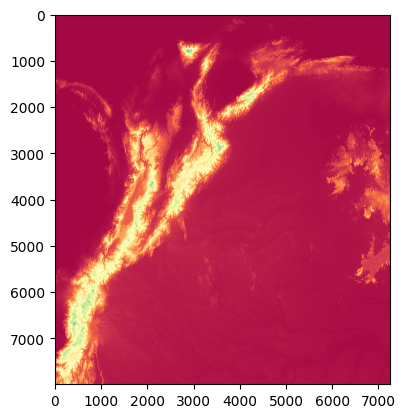

In [90]:
# Part 1: plot a tiff file extracted from the usgs website
import rasterio
import matplotlib.pyplot as plt

file = rasterio.open('/content/usgs_gmted2010_7pnt5arcsec_median_stat_brGORBZ5WYSkumAdPfVz.tiff')
dataset = file.read()
print(dataset.shape)
(1, 9600, 14400)
plt.imshow(dataset[0], cmap='Spectral')
plt.show()


# Location
# https://topotools.cr.usgs.gov/gmted_viewer/index.html?downloadBbox=-4.18054,12.47955,-79.69938,-64.58277

### Part 2: apply a mask to delimit the country
- We can use rasterio to create a georreferenced mask based on a shapefile.
- Note: you need to upload into the same directory the .shp, .dbf and .shx files
- Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector  and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.

- files source: https://github.com/nvkelso/natural-earth-vector/blob/master/10m_cultural/ne_10m_admin_0_countries.shp

## Code Documentation for Part 2: Apply a Mask to Delimit the Country of Interest

### Overview
This part of the code applies a mask to the elevation data to focus on a specific country (Colombia, in this case) from the global dataset. The mask is based on the geographical boundaries of the country, allowing us to crop the elevation data to that region. The resulting map is then visualized.

### Code Breakdown

1. **Importing Libraries**
    ```python
    import geopandas as gpd
    from shapely.geometry import mapping
    from rasterio import mask as msk
    ```
    - `geopandas`: A library used to handle and analyze geographic data, including shapefiles.
    - `shapely.geometry.mapping`: This function converts geometric shapes into a format that can be used with raster data.
    - `rasterio.mask`: A module for applying masks to raster data.

2. **Loading the Shapefile**
    ```python
    df = gpd.read_file('/content/ne_10m_admin_0_countries.shp')
    ```
    - This line loads a shapefile containing boundary data for all countries into the variable `df`. The shapefile is a geographic data format that stores the outlines of countries.
    
3. **Selecting the Country of Interest (Colombia)**
    ```python
    colombia = df.loc[df['ADMIN'] == 'Colombia']
    ```
    - This line filters the `df` DataFrame to select only the row where the country is "Colombia". It stores the result in the variable `colombia`.

4. **Applying the Mask to the Raster Data**
    ```python
    clipped_array, clipped_transform = msk.mask(file, [mapping(colombia.iloc[0].geometry)], crop=True)
    ```
    - `mapping(colombia.iloc[0].geometry)` converts the geographical boundary of Colombia into a format that can be applied as a mask.
    - `msk.mask()` applies this mask to the original raster file (elevation data).
    - The `crop=True` option ensures that only the region within the boundary of Colombia is kept, and the rest of the data is discarded.
    - The result is stored in `clipped_array` (the cropped elevation data) and `clipped_transform` (the transformation information for the new data).

5. **Displaying the Cropped Elevation Map**
    ```python
    plt.imshow(clipped_array[0], cmap='Spectral')
    plt.show()
    ```
    - `clipped_array[0]` accesses the first band of the cropped raster data.
    - `plt.imshow()` displays the cropped elevation data as an image.
    - `cmap='Spectral'` applies a color map to represent the elevation values with colors.
    - `plt.show()` shows the plotted image.

### Conclusion
This part of the code focuses on a specific country (Colombia) by masking the global elevation dataset, effectively cropping the data to the country's boundaries. The result is visualized as a map with elevation values represented in colors.


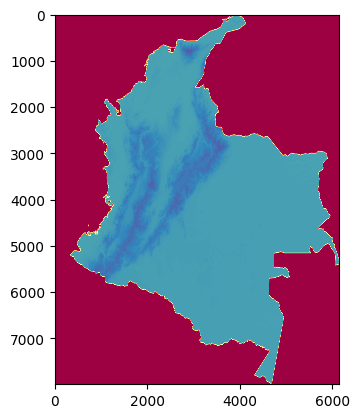

In [91]:
# Part 2: apply a mask to delimit the country of interest

import geopandas as gpd
from shapely.geometry import mapping
from rasterio import mask as msk

df = gpd.read_file('/content/ne_10m_admin_0_countries.shp')

colombia = df.loc[df['ADMIN'] == 'Colombia']

clipped_array, clipped_transform = msk.mask(file, [mapping(colombia.iloc[0].geometry)], crop=True)

plt.imshow(clipped_array[0], cmap='Spectral')
plt.show()

### Code Documentation for Part 3: Clip and Adjust the Raster Data for Colombia

### Overview
In this part of the code, the elevation data for Colombia is clipped and adjusted to ensure all values are positive and within a specific range. The data is then visualized with a color bar indicating the elevation values.

### Code Breakdown

1. **Importing Libraries**
    ```python
    import numpy as np
    from rasterio import mask as msk
    ```
    - `numpy`: A library for numerical operations, used here to manipulate the raster data.
    - `rasterio.mask`: A module used for applying masks to raster data.

2. **Defining the Clipping Function**
    ```python
    def clip_raster(gdf, img):
        clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
        clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)],
                                                       crop=True, nodata=(np.amax(clipped_array[0]) + 1))
        clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
        value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
        return clipped_array, value_range
    ```
    - `clip_raster(gdf, img)` is a function that takes two arguments:
        - `gdf`: A GeoDataFrame containing the geographic boundary of the area of interest (in this case, Colombia).
        - `img`: The raster image (elevation data) to be clipped.
    - Inside the function:
        - The first `msk.mask()` applies the mask to the raster data based on the geometry of Colombia, cropping the image to the country's boundaries.
        - The second `msk.mask()` re-applies the mask but ensures that the `nodata` value (areas outside the country) is set to a value one higher than the maximum elevation found in the image. This avoids mixing real elevation values with areas outside the country.
        - `clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))` shifts all elevation values so that the minimum value becomes positive, ensuring all data points are non-negative.
        - `value_range` calculates the range of elevation values by taking the maximum value and adding the absolute minimum value.
    - The function returns:
        - `clipped_array`: The cropped and adjusted raster data.
        - `value_range`: The range of elevation values in the clipped data.

3. **Calling the Clipping Function**
    ```python
    colombia_topography, value_range = clip_raster(colombia, file)
    ```
    - This line calls the `clip_raster` function, passing in the `colombia` GeoDataFrame (defining Colombia's boundaries) and the `file` containing the raster elevation data.
    - The result is stored in `colombia_topography` (the adjusted elevation data for Colombia) and `value_range` (the range of elevation values).

4. **Visualizing the Adjusted Topography**
    ```python
    plt.figure(figsize=(10,10))
    c = plt.imshow(colombia_topography[0], cmap='Spectral')
    plt.colorbar(c)
    plt.show()
    ```
    - `plt.figure(figsize=(10,10))` sets the size of the plot to 10x10 inches.
    - `plt.imshow(colombia_topography[0], cmap='Spectral')` displays the adjusted elevation data for Colombia, using the 'Spectral' color map to represent elevation values.
    - `plt.colorbar(c)` adds a color bar to the plot, showing the range of elevation values.
    - `plt.show()` displays the plot.

### Conclusion
This part of the code clips the global elevation data to the boundaries of Colombia, adjusts the values to ensure all are positive, and visualizes the topography with a color bar to indicate elevation ranges.


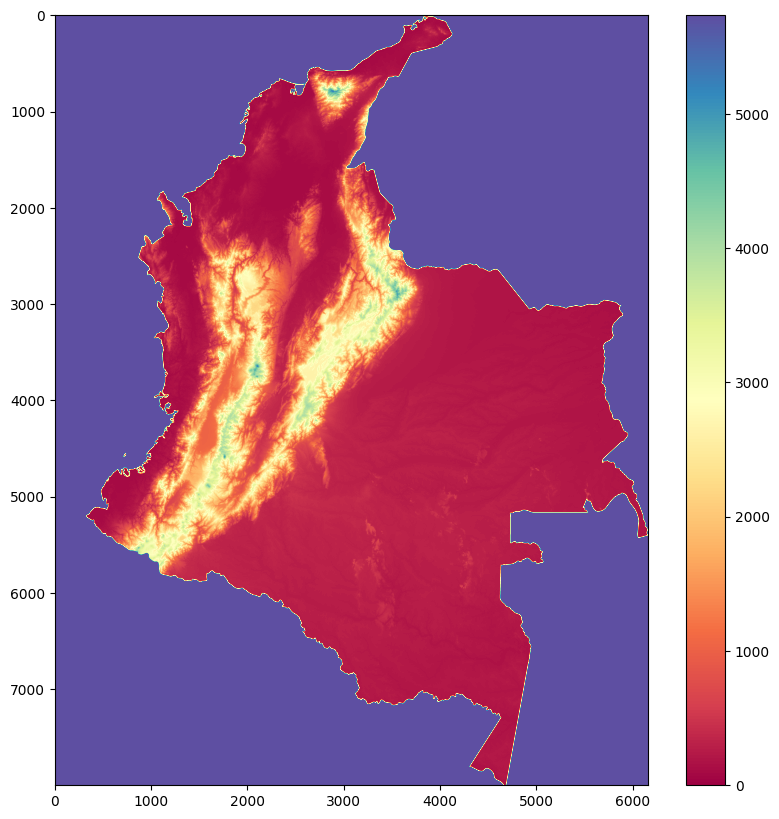

In [92]:
 import numpy as np
 from rasterio import mask as msk

 def clip_raster(gdf, img):
     clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
     clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)],
                                                           crop=True, nodata=(np.amax(clipped_array[0]) + 1))
     clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
     value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
     return clipped_array, value_range

colombia_topography, value_range = clip_raster(colombia, file)

plt.figure(figsize=(10,10))
c = plt.imshow(colombia_topography[0], cmap='Spectral')
plt.colorbar(c)
plt.show()

## Code Documentation for Part 4: Clip, Mask, and Visualize the Topography of Colombia

### Overview
This part of the code clips the raster data to the boundaries of Colombia, assigns a mask to areas outside the country, normalizes the values for better visualization, and then plots the topography of Colombia using a color map. The plot includes a color bar indicating the elevation values.

### Code Breakdown

1. **Importing Libraries**
    ```python
    import numpy as np
    import matplotlib.pyplot as plt
    from rasterio import mask as msk
    from matplotlib.colors import Normalize
    from shapely.geometry import mapping
    ```
    - `numpy`: A library for numerical operations, used here to manipulate raster data.
    - `matplotlib.pyplot`: A library used for plotting graphs and images.
    - `rasterio.mask`: A module used for applying masks to raster data.
    - `matplotlib.colors.Normalize`: A tool for normalizing data values to a specific range for visualization.
    - `shapely.geometry.mapping`: Converts geometric shapes into a format that can be used with raster data.

2. **Defining the Clipping and Normalizing Function**
    ```python
    def clip_raster(gdf, img):
        # Clip the raster based on the geometry
        clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
        # Assign nodata value to areas outside the mask
        clipped_array, clipped_transform = msk.mask(
            img,
            [mapping(gdf.iloc[0].geometry)],
            crop=True,
            nodata=(np.amax(clipped_array[0]) + 1)
        )
        # Normalize values for better visualization
        clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
        value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
        return clipped_array, value_range
    ```
    - `clip_raster(gdf, img)` is a function that clips the raster image `img` (elevation data) to the boundaries defined in `gdf` (GeoDataFrame for Colombia).
    - The first `msk.mask()` clips the raster data to Colombia's boundaries.
    - The second `msk.mask()` assigns a `nodata` value (areas outside the mask) to pixels that are not within Colombia.
    - `clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))` shifts all values in the raster so that the minimum value becomes positive.
    - `value_range` calculates the range of values (difference between the maximum and minimum elevation values in the cropped raster).
    - The function returns:
        - `clipped_array`: The clipped and adjusted elevation data.
        - `value_range`: The range of elevation values.

3. **Clipping the Raster**
    ```python
    colombia_topography, value_range = clip_raster(colombia, file)
    ```
    - This line calls the `clip_raster` function, passing in the `colombia` GeoDataFrame (defining Colombia's boundaries) and the `file` containing the raster elevation data.
    - The result is stored in `colombia_topography` (the clipped and adjusted elevation data) and `value_range` (the range of elevation values).

4. **Plotting the Map**
    ```python
    plt.figure(figsize=(10, 10))

    # Create a colormap with white as the background for masked areas
    colormap = plt.cm.get_cmap('terrain')
    norm = Normalize(vmin=0, vmax=value_range)
    masked_array = np.ma.masked_where(colombia_topography[0] == (np.amax(colombia_topography[0]) + 1), colombia_topography[0])

    # Plot the elevation data
    c = plt.imshow(masked_array, cmap=colormap, norm=norm)

    # Add a colorbar
    cb = plt.colorbar(c, shrink=0.8, label="Elevation (meters)")
    cb.ax.tick_params(labelsize=10)

    # Add a title and remove axes for a clean look
    plt.title("Topography of Colombia", fontsize=14)
    plt.axis("off")  # Remove axes

    # Show the plot
    plt.show()
    ```
    - `plt.figure(figsize=(10, 10))` sets the size of the plot to 10x10 inches.
    - `colormap = plt.cm.get_cmap('terrain')` sets the color map to 'terrain', which is commonly used for topographic data.
    - `norm = Normalize(vmin=0, vmax=value_range)` normalizes the elevation values to fit within the range from 0 to the maximum elevation value.
    - `masked_array = np.ma.masked_where(colombia_topography[0] == (np.amax(colombia_topography[0]) + 1), colombia_topography[0])` creates a masked array where values equal to the nodata value are masked (i.e., not displayed).
    - `plt.imshow(masked_array, cmap=colormap, norm=norm)` plots the elevation data using the specified colormap and normalization.
    - `plt.colorbar(c, shrink=0.8, label="Elevation (meters)")` adds a color bar to the plot, labeled with "Elevation (meters)", and shrinks the color bar to 80% of its original size.
    - `plt.title("Topography of Colombia", fontsize=14)` adds a title to the plot.
    - `plt.axis("off")` removes the axis labels for a cleaner appearance.
    - `plt.show()` displays the plot.

### Conclusion
This part of the code clips the global elevation data to Colombia, applies a mask to hide areas outside the country, normalizes the data for better visualization, and displays the topography of Colombia with a color map and color bar. The final plot provides a clear and visually appealing representation of the elevation data for Colombia.


<ipython-input-93-5fe3b255de63>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('terrain')


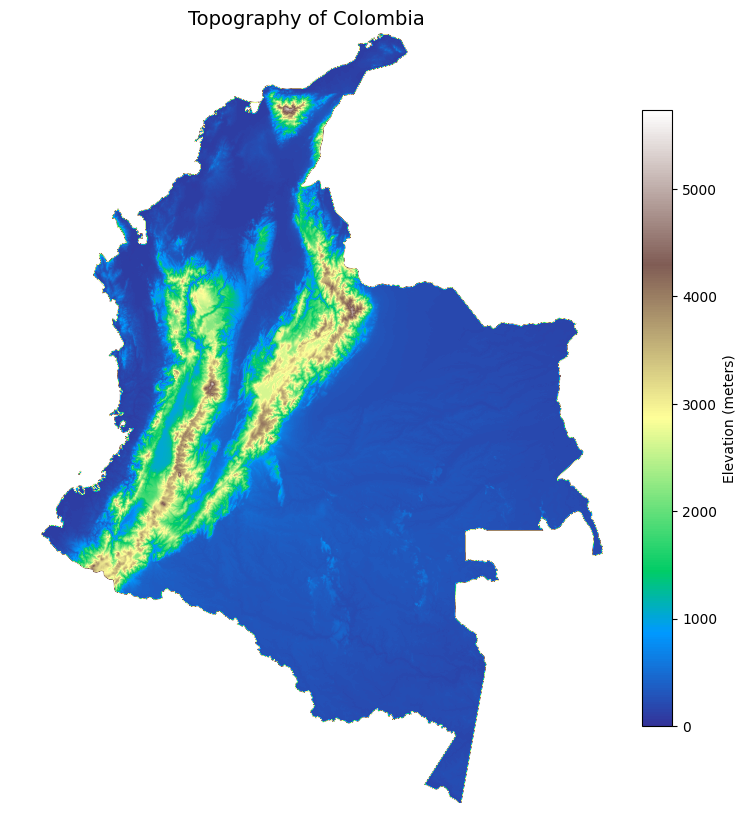

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from rasterio import mask as msk
from matplotlib.colors import Normalize
from shapely.geometry import mapping

def clip_raster(gdf, img):
    # Clip the raster based on the geometry
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    # Assign nodata value to areas outside the mask
    clipped_array, clipped_transform = msk.mask(
        img,
        [mapping(gdf.iloc[0].geometry)],
        crop=True,
        nodata=(np.amax(clipped_array[0]) + 1)
    )
    # Normalize values for better visualization
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range

# Clip the raster
colombia_topography, value_range = clip_raster(colombia, file)

# Plotting the map
plt.figure(figsize=(10, 10))

# Create a colormap with white as the background for masked areas
colormap = plt.cm.get_cmap('terrain')
norm = Normalize(vmin=0, vmax=value_range)
masked_array = np.ma.masked_where(colombia_topography[0] == (np.amax(colombia_topography[0]) + 1), colombia_topography[0])

# Plot the elevation data
c = plt.imshow(masked_array, cmap=colormap, norm=norm)

# Add a colorbar
cb = plt.colorbar(c, shrink=0.8, label="Elevation (meters)")
cb.ax.tick_params(labelsize=10)

# Add a title and remove axes for a clean look
plt.title("Topography of Colombia", fontsize=14)
plt.axis("off")  # Remove axes

# Show the plot
plt.show()

In [ ]:
# pip install earthpy
# uncomment this line if earthpy is not installed

## Code Documentation for Part 5: Generate and Visualize a Hillshade Map

### Overview
In this part of the code, a hillshade map is generated from the elevation data of Colombia. Hillshading is a technique used to simulate the effect of sunlight on the terrain, providing a 3D effect that makes the topography easier to interpret. The hillshade map is then visualized using a grayscale color map.

### Code Breakdown

1. **Importing the Required Library**
    ```python
    import earthpy.spatial as es
    ```
    - `earthpy.spatial`: A module from the EarthPy library that contains spatial analysis functions, including one for generating hillshade maps.

2. **Generating the Hillshade**
    ```python
    hillshade = es.hillshade(colombia_topography[0], azimuth=240, altitude=1)
    ```
    - `es.hillshade()` generates a hillshade map from the elevation data.
    - `colombia_topography[0]`: This accesses the first band of the elevation data (which contains the topography of Colombia).
    - `azimuth=240`: The azimuth (the angle of the light source in degrees) is set to 240°, which represents the direction from which the light is shining (e.g., from the southwest).
    - `altitude=1`: The altitude (the angle of the light above the horizon) is set to 1°, simulating low-angle sunlight. This results in more pronounced shadows, helping to highlight the terrain features.

3. **Plotting the Hillshade Map**
    ```python
    plt.figure(figsize=(10, 8))
    plt.imshow(hillshade, cmap="Greys", interpolation="none")
    plt.title("Hillshade Map", fontsize=16)
    plt.axis("off")  # Optional: Removes axis labels
    plt.colorbar(label="Shading Intensity")
    plt.show()
    ```
    - `plt.figure(figsize=(10, 8))`: This sets the size of the figure to 10x8 inches.
    - `plt.imshow(hillshade, cmap="Greys", interpolation="none")`: This displays the hillshade map using a grayscale color map (`"Greys"`) to represent shading intensity. The `interpolation="none"` option ensures that the image pixels are displayed without smoothing.
    - `plt.title("Hillshade Map", fontsize=16)`: This adds a title to the plot.
    - `plt.axis("off")`: This removes the axis labels for a cleaner look.
    - `plt.colorbar(label="Shading Intensity")`: This adds a color bar to the plot, which represents the shading intensity, indicating how the light and shadows vary across the terrain.
    - `plt.show()`: This displays the final plot.

### Conclusion
This part of the code generates a hillshade map from the topography of Colombia, simulating the effect of sunlight on the terrain. The map is visualized in grayscale, and a color bar is added to show the shading intensity. The hillshade technique helps highlight topographic features, making it easier to understand the landscape's shape and structure.


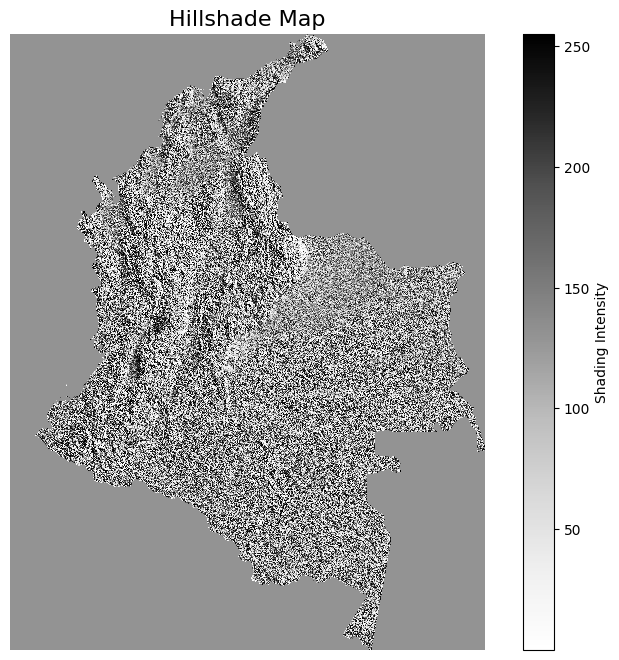

In [94]:
import earthpy.spatial as es

hillshade = es.hillshade(colombia_topography[0], azimuth=240, altitude=1)

plt.figure(figsize=(10, 8))
plt.imshow(hillshade, cmap="Greys", interpolation="none")
plt.title("Hillshade Map", fontsize=16)
plt.axis("off")  # Optional: Removes axis labels
plt.colorbar(label="Shading Intensity")
plt.show()

## Code Documentation for Part 6: Overlay Hillshade on Elevation Map

### Overview
This part of the code generates an elevation map of Colombia, applies a hillshade effect to simulate sunlight, and overlays the hillshade map on top of the elevation map. This combined visualization highlights the topography with both elevation data and shaded relief, providing a clearer 3D perspective of the terrain.

### Code Breakdown

1. **Importing the Required Libraries**
    ```python
    import numpy as np
    import matplotlib.pyplot as plt
    from rasterio import mask as msk
    from matplotlib.colors import Normalize
    from shapely.geometry import mapping
    import earthpy.spatial as es
    ```
    - `numpy`: A library for numerical operations, used here to manipulate raster data.
    - `matplotlib.pyplot`: A library for plotting graphs and images.
    - `rasterio.mask`: A module used to apply masks to raster data.
    - `matplotlib.colors.Normalize`: A tool for normalizing data values for visualization.
    - `shapely.geometry.mapping`: Converts geometries into a format that can be used with raster data.
    - `earthpy.spatial`: A library for spatial analysis, including functions for generating hillshade maps.

2. **Defining the Clipping and Normalizing Function**
    ```python
    def clip_raster(gdf, img):
        # Clip the raster based on the geometry
        clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
        # Assign nodata value to areas outside the mask
        clipped_array, clipped_transform = msk.mask(
            img,
            [mapping(gdf.iloc[0].geometry)],
            crop=True,
            nodata=(np.amax(clipped_array[0]) + 1)
        )
        # Normalize values for better visualization
        clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
        value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
        return clipped_array, value_range
    ```
    - `clip_raster(gdf, img)` clips the raster image `img` (elevation data) to the boundaries defined in `gdf` (GeoDataFrame for Colombia).
    - It applies a mask to keep only the area of interest (Colombia), assigns a `nodata` value to areas outside the mask, and normalizes the raster values for better visualization.
    - The function returns:
        - `clipped_array`: The clipped and adjusted elevation data.
        - `value_range`: The range of elevation values.

3. **Clipping the Raster**
    ```python
    colombia_topography, value_range = clip_raster(colombia, file)
    ```
    - This line calls the `clip_raster` function, passing in the `colombia` GeoDataFrame (defining Colombia's boundaries) and the `file` containing the raster elevation data.
    - The result is stored in `colombia_topography` (the clipped and adjusted elevation data) and `value_range` (the range of elevation values).

4. **Generating the Hillshade Map**
    ```python
    hillshade = es.hillshade(colombia_topography[0], azimuth=240, altitude=30)
    ```
    - `es.hillshade()` generates a hillshade map from the elevation data.
    - `colombia_topography[0]`: This accesses the first band of the elevation data (which contains the topography of Colombia).
    - `azimuth=240`: The azimuth (the angle of the light source in degrees) is set to 240°, which represents the direction from which the light is shining (e.g., from the southwest).
    - `altitude=30`: The altitude (the angle of the light above the horizon) is set to 30°, simulating moderate sunlight for a more natural shading effect.

5. **Plotting the Overlay**
    ```python
    plt.figure(figsize=(10, 10))

    # Create a colormap with white as the background for masked areas
    colormap = plt.colormaps['terrain']
    norm = Normalize(vmin=0, vmax=value_range)
    masked_array = np.ma.masked_where(colombia_topography[0] == (np.amax(colombia_topography[0]) + 1), colombia_topography[0])

    # Plot the elevation map with transparency
    img = plt.imshow(masked_array, cmap=colormap, norm=norm)

    # Overlay the hillshade map
    plt.imshow(hillshade, cmap='Greys', alpha=0.4)  # Use alpha for transparency

    # Add a colorbar for elevation
    cb = plt.colorbar(img, shrink=0.8, label="Elevation (meters)")
    cb.ax.tick_params(labelsize=10)

    # Add a title and remove axes for a clean look
    plt.title("Topography of Colombia with Hillshade", fontsize=14)
    plt.axis("off")  # Remove axes

    # Show the plot
    plt.show()
    ```
    - `plt.figure(figsize=(10, 10))`: Sets the size of the figure to 10x10 inches.
    - `colormap = plt.colormaps['terrain']`: Sets the colormap to 'terrain', which is suitable for representing topographic elevation.
    - `norm = Normalize(vmin=0, vmax=value_range)`: Normalizes the elevation values to fit within the range from 0 to the maximum elevation value.
    - `masked_array = np.ma.masked_where(colombia_topography[0] == (np.amax(colombia_topography[0]) + 1), colombia_topography[0])`: Creates a masked array where values equal to the nodata value are masked (i.e., not displayed).
    - `plt.imshow(masked_array, cmap=colormap, norm=norm)`: Plots the elevation map using the specified colormap and normalization.
    - `plt.imshow(hillshade, cmap='Greys', alpha=0.4)`: Overlays the hillshade map on top of the elevation map with a transparency level of 40% (alpha=0.4), allowing both maps to be visible.
    - `plt.colorbar(img, shrink=0.8, label="Elevation (meters)")`: Adds a color bar for the elevation map.
    - `plt.title("Topography of Colombia with Hillshade", fontsize=14)`: Adds a title to the plot.
    - `plt.axis("off")`: Removes the axis labels for a cleaner appearance.
    - `plt.show()`: Displays the final plot.

### Conclusion
This part of the code overlays a hillshade effect onto an elevation map of Colombia. The result is a visualization that combines both elevation data and shading, simulating the effect of sunlight on the terrain. This combined map provides a more detailed and visually appealing representation of the country's topography.


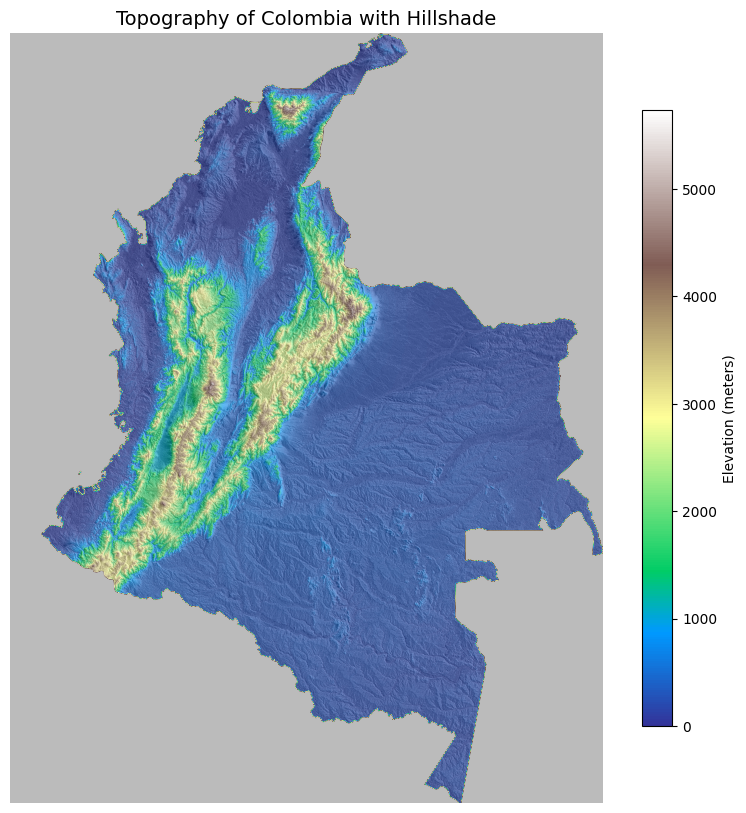

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from rasterio import mask as msk
from matplotlib.colors import Normalize
from shapely.geometry import mapping
import earthpy.spatial as es

def clip_raster(gdf, img):
    # Clip the raster based on the geometry
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    # Assign nodata value to areas outside the mask
    clipped_array, clipped_transform = msk.mask(
        img,
        [mapping(gdf.iloc[0].geometry)],
        crop=True,
        nodata=(np.amax(clipped_array[0]) + 1)
    )
    # Normalize values for better visualization
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range

# Clip the raster
colombia_topography, value_range = clip_raster(colombia, file)

# Generate the hillshade map
hillshade = es.hillshade(colombia_topography[0], azimuth=240, altitude=30)

# Plotting the overlay
plt.figure(figsize=(10, 10))

# Create a colormap with white as the background for masked areas
colormap = plt.colormaps['terrain']
norm = Normalize(vmin=0, vmax=value_range)
masked_array = np.ma.masked_where(colombia_topography[0] == (np.amax(colombia_topography[0]) + 1), colombia_topography[0])

# Plot the elevation map with transparency
img = plt.imshow(masked_array, cmap=colormap, norm=norm)

# Overlay the hillshade map
plt.imshow(hillshade, cmap='Greys', alpha=0.4)  # Use alpha for transparency

# Add a colorbar for elevation
cb = plt.colorbar(img, shrink=0.8, label="Elevation (meters)")
cb.ax.tick_params(labelsize=10)

# Add a title and remove axes for a clean look
plt.title("Topography of Colombia with Hillshade", fontsize=14)
plt.axis("off")  # Remove axes

# Show the plot
plt.show()


### Finally, let's see all the steps in a single block of code

In [ ]:
#pip install rasterio
# pip install earthpy

# uncomment the lines above if the code does not work, may need to install rasterio and earthpy

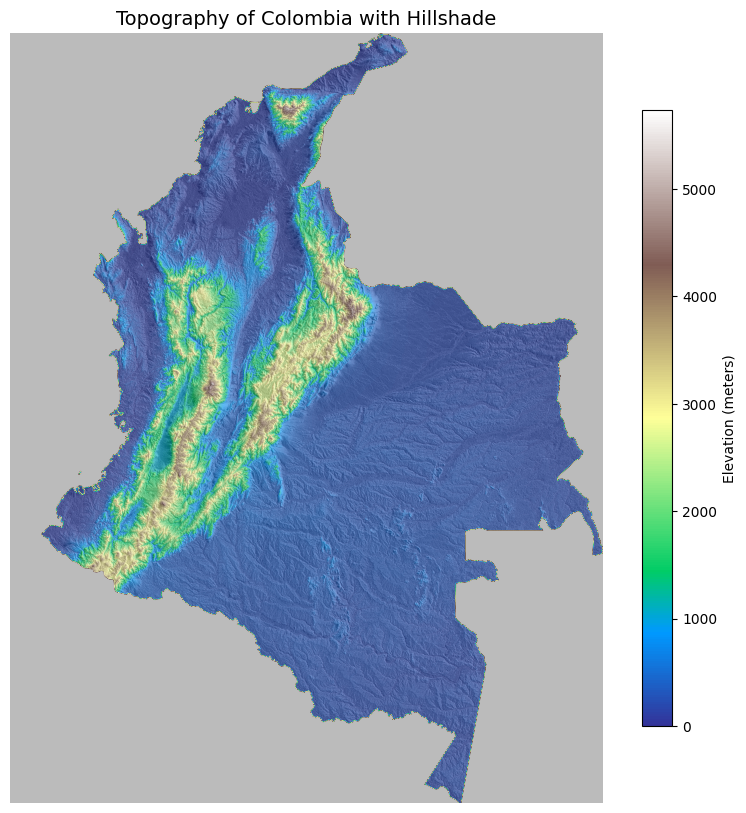

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from rasterio import mask as msk
from matplotlib.colors import Normalize
from shapely.geometry import mapping
import geopandas as gpd
import earthpy.spatial as es
import rasterio

# Load the raster data (elevation map)
file_path = '/content/usgs_gmted2010_7pnt5arcsec_median_stat_brGORBZ5WYSkumAdPfVz.tiff'
file = rasterio.open(file_path)

# Load the shapefile of countries (for clipping)
shapefile_path = '/content/ne_10m_admin_0_countries.shp'
df = gpd.read_file(shapefile_path)

# Filter for Colombia
colombia = df.loc[df['ADMIN'] == 'Colombia']

# Function to clip raster based on the country boundary and normalize
def clip_raster(gdf, img):
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    clipped_array, clipped_transform = msk.mask(
        img,
        [mapping(gdf.iloc[0].geometry)],
        crop=True,
        nodata=(np.amax(clipped_array[0]) + 1)
    )
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range

# Clip the raster to Colombia's boundary
colombia_topography, value_range = clip_raster(colombia, file)

# Generate the hillshade map with a specified light source direction
hillshade = es.hillshade(colombia_topography[0], azimuth=240, altitude=30)

# Plotting the overlay map
plt.figure(figsize=(10, 10))

# Create a colormap for the elevation map
colormap = plt.colormaps['terrain']
norm = Normalize(vmin=0, vmax=value_range)
masked_array = np.ma.masked_where(colombia_topography[0] == (np.amax(colombia_topography[0]) + 1), colombia_topography[0])

# Plot the elevation map
img = plt.imshow(masked_array, cmap=colormap, norm=norm)

# Overlay the hillshade map with some transparency
plt.imshow(hillshade, cmap='Greys', alpha=0.4)  # Use alpha for transparency

# Add a colorbar for elevation values
cb = plt.colorbar(img, shrink=0.8, label="Elevation (meters)")
cb.ax.tick_params(labelsize=10)

# Add a title and remove axes for a cleaner look
plt.title("Topography of Colombia with Hillshade", fontsize=14)
plt.axis("off")  # Remove axes

# Show the final plot
plt.show()


# Example 2: using GeoJSON files

## Code Documentation: Downloading a GeoJSON File of Colombia

### Overview
This code downloads a GeoJSON file representing the country of Colombia. GeoJSON is a widely used format for encoding geographical data structures, such as points, lines, and polygons, along with attributes. The downloaded file can then be used for mapping or spatial analysis purposes.

### Code Breakdown

1. **Downloading the GeoJSON File**
    ```python
    ! wget --quiet https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json
    ```
    - `! wget --quiet`: This command uses `wget` to download files from the internet. The `--quiet` flag suppresses the output, so the process runs silently.
    - The URL provided points to a GeoJSON file representing the boundary of Colombia. This file contains geographical data that defines the shape of the country.
    
2. **Confirmation Message**
    ```python
    print('GeoJSON file downloaded!')
    ```
    - This line prints a confirmation message once the file has been successfully downloaded.

### What is GeoJSON?

GeoJSON (Geographical JSON) is a format for encoding a variety of geographic data structures using JavaScript Object Notation (JSON). It is used to represent geographical features along with their attributes in a simple, standardized format.

GeoJSON is widely used for visualizing geographical data on maps, conducting spatial analysis, and sharing geographic datasets across various tools and platforms. The main types of data that GeoJSON can represent include:
- **Point**: A single geographic location, e.g., a city or landmark.
- **LineString**: A series of connected points forming a line, such as a road or river.
- **Polygon**: A closed shape defined by multiple points, often used for representing areas like countries, cities, or parks.
- **Multi-Geometry**: GeoJSON can also represent collections of different geometries, such as multiple polygons or points.

GeoJSON is compatible with many geographic information systems (GIS) and mapping libraries like Leaflet, Google Maps, and others, which can directly visualize GeoJSON files.

### Use Cases for GeoJSON

- **Mapping**: GeoJSON is commonly used to plot geographical features on web maps, such as boundaries of countries, cities, and other regions.
- **Spatial Analysis**: GeoJSON allows for the storage of geographical shapes and their related attributes, which can be used for further spatial analysis and processing in various GIS tools.
- **Sharing Data**: It provides a lightweight format for sharing geographical datasets between users and systems, allowing for easy integration with other tools and platforms.

### Conclusion
The code provided downloads a GeoJSON file representing the borders of Colombia. This file can be used for various geographical tasks, including visualizing Colombia on a map or performing spatial analysis on its boundaries. GeoJSON is a versatile and commonly used format in the field of geospatial data analysis and mapping.


In [89]:
# download colombia geojson file
! wget --quiet https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json

print('GeoJSON file downloaded!')

GeoJSON file downloaded!


## Code Documentation: Loading a GeoJSON File of Colombia

### Overview
This code snippet defines a variable `colombia_geo` that stores the URL of a GeoJSON file representing the boundaries of Colombia. GeoJSON is a format used to encode geographical features and their associated properties. This file can be used for mapping, spatial analysis, and geographic visualization.

### Code Breakdown

1. **Defining the URL of the GeoJSON File**
    ```python
    colombia_geo = r'https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json'
    ```
    - `colombia_geo`: This variable stores the URL of the GeoJSON file that contains the geographic boundary data for Colombia.
    - The `r` before the string is used to indicate a raw string, which treats backslashes in the string literally (if there were any). This is useful for file paths or URLs to avoid escape character issues.

2. **URL Description**
    - The URL points to a specific raw file hosted on GitHub Gist, which contains the geographic boundary information for Colombia in GeoJSON format.


In [97]:

# Source: https://gist.github.com/john-guerra/43c7656821069d00dcbc
colombia_geo = r'https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json' # geojson file

## Code Documentation: Visualizing Colombia with Folium and GeoJSON

### Overview
This code snippet uses **Folium**, a Python library for creating interactive maps, to visualize Colombia's boundaries by adding a GeoJSON file to a base map. The map is centered around Colombia and displays its boundaries using the previously defined GeoJSON URL.

### Code Breakdown

1. **Importing the Folium Library**
    ```python
    import folium
    ```
    - The `folium` library is imported, which is used for creating interactive maps in Python. Folium works by wrapping the Leaflet.js library, allowing for easy integration of maps in Python.

2. **Defining the Center Coordinates of Colombia**
    ```python
    latitude = 4.5709
    longitude = -74.2973
    ```
    - These variables store the latitude and longitude of Colombia's geographic center. The coordinates are used to center the map.

3. **Creating a Folium Map**
    ```python
    colombia_map = folium.Map(location=[latitude, longitude], zoom_start=6)
    ```
    - A new Folium map object, `colombia_map`, is created. The `location` parameter centers the map around the defined latitude and longitude (Colombia's center), and the `zoom_start` sets the initial zoom level (6) for the map.

4. **Adding the GeoJSON File to the Map**
    ```python
    folium.GeoJson(colombia_geo).add_to(colombia_map)
    ```
    - The `folium.GeoJson()` function is used to load the GeoJSON file (`colombia_geo`), which contains the geographical boundary data for Colombia.
    - The `add_to()` method adds the GeoJSON layer to the `colombia_map` object, making the boundaries of Colombia visible on the map.

5. **Displaying the Map**
    ```python
    colombia_map
    ```
    - This line displays the interactive map in Jupyter notebooks or similar environments. In other environments, you might need to use `colombia_map.save('colombia_map.html')` to save the map to an HTML file for viewing in a browser.


In [88]:
import folium

# Coordinates for the center of Colombia
latitude = 4.5709
longitude = -74.2973

# Create a folium map centered around Colombia with zoom level 6
colombia_map = folium.Map(location=[latitude, longitude], zoom_start=6)

# add the GeoJson file to the basemap
folium.GeoJson(colombia_geo).add_to(colombia_map)

# Display the map
colombia_map


## And in this block we can save the map as html to visualize it in a browser

In [98]:
import folium  # Importing the folium library for creating interactive maps

# Create a folium map centered around Colombia (latitude, longitude) with zoom level 6
# and add the GeoJSON file representing Colombia's boundaries to the map
folium.Map(location=[4.5709, -74.2973], zoom_start=6) \
    .add_child(folium.GeoJson('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json')) \
    .save('colombia_map.html')  # Save the map as an HTML file that can be opened in a web browser


# Example 3: London Police records

## Plotting crimes occured in London

### About Dataset
This dataset provides a complete snapshot of crime, outcome, and stop and search data, as held by the Home Office from late 2014 through mid 2017 for London, both the greater metro and the city.

### Content
The core fields are as follows:

- Reported by: The force that provided the data about the crime.

- Falls within: At present, also the force that provided the data about the crime. This is currently being looked into and is likely to change in the near future.

- Longitude and Latitude: The anonymised coordinates of the crime.

- LSOA code and LSOA name: References to the Lower Layer Super Output Area that the anonymised point falls into, according to the LSOA boundaries provided by the Office for National Statistics.

- Crime type: One of the crime types listed in the Police.UK FAQ.

- Last outcome category: A reference to whichever of the outcomes associated with the crime occurred most recently. For example, this crime's 'Last outcome category' would be 'Offender fined'.

In [104]:
import pandas as pd

# Load the CSV file
london = pd.read_csv('/content/london-outcomes.csv')

# Drop rows with NaN values
london_cleaned = london.dropna()

# source: https://www.kaggle.com/datasets/sohier/london-police-records/data

In [105]:
# Check the resulting dataframe
london_cleaned.head()

Crime ID    Month  \
1  64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...  2014-06   
2  d9909143deda1db75d8ba35b701f31b268d9273764ad42...  2014-06   
3  bd44c99de1bdc727abc7c682bf3916969a3bc673e93093...  2014-06   
4  f8e3fc7e63baa91ddd6625dd1f4f48203f565fd021d9d4...  2014-06   
5  0bca94e0f7c12d09f829c03317f6d6dd971f159cd6fe1f...  2014-06   

             Reported by           Falls within  Longitude   Latitude  \
1  City of London Police  City of London Police  -0.088843  51.509532   
2  City of London Police  City of London Police  -0.084701  51.509320   
3  City of London Police  City of London Police  -0.079080  51.519615   
4  City of London Police  City of London Police  -0.104281  51.516032   
5  City of London Police  City of London Police  -0.077777  51.518046   

                         Location  LSOA code            LSOA name  \
1         On or near Parking Area  E01032739  City of London 001F   
2  On or near LOWER THAMES STREET  E01032739  City of London 001F   
3          On or near BISHOPSGATE  E01004307   Tower Hamlets 015B   
4           On or near BEAR ALLEY  E01032740  City of London 001G   
5          On or near SANDY'S ROW  E01032739  City of London 001F   

                                    Outcome type  
1  Investigation complete; no suspect identified  
2  Investigation complete; no suspect identified  
3    Formal action is not in the public interest  
4  Investigation complete; no suspect identified  
5  Investigation complete; no suspect identified

In [106]:
# The file is massive, so let's limit the dataframe to 500 crime cases
limit = 1000
london_cleaned = london_cleaned.iloc[0:limit, :]

In [102]:
# Let's plot before a folium map of London to check the latitude and longitude
import folium

# Coordinates for central London
latitude = 51.5074
longitude = -0.1278

# Create a folium map centered around London with zoom level 12
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map
london_map


## Code Documentation: Visualizing Incident Locations in London Using Folium's MarkerCluster

### Overview
This code snippet uses the **Folium** library to create an interactive map of London and visualize incidents (or data points) from a DataFrame. The incidents are represented using markers, and a **MarkerCluster** is applied to group nearby markers, making the map cleaner and more interactive.

### Code Breakdown

1. **Importing the Plugins from Folium**
    ```python
    from folium import plugins
    ```
    - The `plugins` module from the `folium` library is imported to use **MarkerCluster**, which allows for clustering of map markers.

2. **Creating a Map of London**
    ```python
    london_map = folium.Map(location=[latitude, longitude], zoom_start=12)
    ```
    - A new map object, `london_map`, is created using `folium.Map()`. The map is centered around **London** with the specified latitude and longitude. The zoom level is set to `12`, which is a suitable zoom for viewing individual incidents or markers.

3. **Initializing a Marker Cluster**
    ```python
    incidents = plugins.MarkerCluster().add_to(london_map)
    ```
    - A **MarkerCluster** object is instantiated, which is used to group nearby markers. This helps avoid overcrowding of markers on the map by clustering them into groups.
    - The `add_to(london_map)` method adds the `MarkerCluster` object to the map.

4. **Adding Data Points (Incidents) to the Marker Cluster**
    ```python
    for lat, lng in zip(london_cleaned.Latitude, london_cleaned.Longitude):
        folium.Marker(
            location=[lat, lng],
            icon=None,
            #popup=label,
        ).add_to(incidents)
    ```
    - A loop iterates through the latitude and longitude values of incidents from a **DataFrame** (`london_cleaned`).
    - For each data point, a **Marker** is created at the corresponding latitude and longitude, and added to the `MarkerCluster` object (`incidents`).
    - The `icon=None` indicates that the markers don't use custom icons, and the `popup=label` part is commented out but could be used to display a label or additional information when a user clicks on a marker.

5. **Displaying the Map**
    ```python
    london_map
    ```
    - The map object `london_map` is returned to display the interactive map within the notebook or environment.
    - In other environments, you might need to save the map to an HTML file using `.save('london_map.html')` to view it in a browser.

### What is MarkerCluster?

The **MarkerCluster** is a plugin in Folium that helps in clustering multiple markers that are located near each other on the map. Instead of showing all the markers individually, which can overwhelm the viewer, the **MarkerCluster** groups markers into clusters. As you zoom in, the markers within each cluster will expand to show individual markers, providing a cleaner, more manageable map.

### Use Case

- This code is useful when visualizing large datasets with geographical points, such as incidents, accidents, or locations.
- By using **MarkerCluster**, the map becomes interactive and easier to interpret, as it prevents the display of overlapping markers, especially when the points are located close to each other.

### Conclusion

This code creates an interactive map of London with incidents visualized as markers. **MarkerCluster** is used to group markers that are located close to each other, improving map usability. The final map is interactive, allowing users to zoom and explore the markers grouped in clusters.



In [107]:
from folium import plugins

# let's start again with a clean copy of the map of London
london_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(london_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, in zip(london_cleaned.Latitude, london_cleaned.Longitude):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        #popup=label,
    ).add_to(incidents)

# display map
london_map

In [119]:
# Warning this map is only for the city of london area, I added the London Borough geojson to see the delimited area
import folium
from folium import plugins
import geopandas as gpd

# Define the latitude and longitude for London's center
latitude, longitude = 51.51234430, -0.09098520

# Create a clean copy of the map of London
london_map = folium.Map(location=[latitude, longitude], zoom_start=14)

# Add London borough boundaries
london_boroughs = gpd.read_file('/content/london_boroughs.geojson')
folium.GeoJson(
    london_boroughs,
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7,
    }
).add_to(london_map)

# Instantiate a marker cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(london_map)

# Loop through the dataframe and add each data point to the marker cluster
for lat, lng in zip(london_cleaned.Latitude, london_cleaned.Longitude):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        #popup=label,
    ).add_to(incidents)

# Display map
london_map
